<a href="https://colab.research.google.com/github/TiaErikaDev/-INDICIUM-_Desafio_Cientista_Dados/blob/main/%5BINDICIUM%5D_Analise_Exploratoria_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Cientista de Dados**


---



#### **Erika Mayara de Oliveira Pimentel**


---


#### Descrição do Desafio:

> Seu objetivo é identificar quais máquinas apresentam potencial de falha tendo como base dados extraídos através de sensores durante o processo de manufatura.  Para isso são fornecidos dois datasets: um dataset chamado desafio_manutencao_preditiva_treino composto por 6667 linhas, 9 colunas de informação (features) e a variável a ser prevista (“failure_type”). O segundo dataset chamado de desafio_manutencao_preditiva_teste possui 3333 linhas e 8 colunas e não possui a coluna “failure_type”. Seu objetivo é prever essa coluna a partir dos dados enviados.



---
#### Objetivo:


> Identificar quais máquinas apresentam potencial de falha.

---
#### Variáveis:
 - **UID:** identificador único que varia de 1 a 10000.
 - **product_id:** consistindo em uma letra L, M ou H para baixo (50% de todos os produtos), médio (30%) e alto (20%) como variantes de qualidade do produto e um número de série específico da variante.
 - **type:** apenas o tipo de produto L, M ou H da coluna 2.
 - **air_temperature_k:** gerada usando um processo de passeio aleatório posteriormente normalizado para um desvio padrão de 2 K em torno de 300 K.
 - **process_temperature_k:** gerada usando um processo de passeio aleatório normalizado para um desvio padrão de 1 K, adicionado à temperatura do ar mais 10 K.
 - **rotational_speed_rpm:** calculada a partir de uma potência de 2860 W, sobreposta com um ruído normalmente distribuído.
 - **torque_nm:** os valores de torque são normalmente distribuídos em torno de 40 Nm com SD = 10 Nm e sem valores negativos.
 - **tool_wear_min:** As variantes de qualidade H/M/L adicionam 5/3/2 minutos de desgaste da ferramenta à ferramenta utilizada no processo.










# **Análise Exploratória dos Dados (EDA)**


---




In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ler os dados de treinamento
df_train = pd.read_csv("desafio_manutencao_preditiva_treino.csv")

# Visualizar as primeiras linhas do dataframe de treinamento
df_train.head()


,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


In [146]:
# Verificar quantidades de linhas e colunas
# Analisar se existem dados faltantes ou nulos
# Verificar tipos de dados

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


In [147]:
# Analisar estatísticas básicas
# Verificar mínimos e máximos para garantir se estão dentro dos limites esperados
# Verificar intervalo de variação da medida
# Verificar possíveis outliers

df_train.describe().round()

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.0,6667.0,6667.0,6667.0,6667.0,6667.0
mean,4995.0,300.0,310.0,1537.0,40.0,108.0
std,2896.0,2.0,1.0,177.0,10.0,63.0
min,1.0,295.0,306.0,1168.0,4.0,0.0
25%,2496.0,298.0,309.0,1422.0,33.0,54.0
50%,4983.0,300.0,310.0,1503.0,40.0,108.0
75%,7510.0,302.0,311.0,1612.0,47.0,162.0
max,10000.0,304.0,314.0,2886.0,77.0,251.0


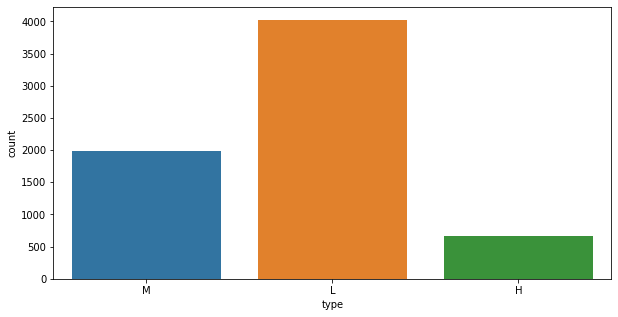

In [148]:
# Contagem da variável tipo

plt.figure(figsize=(10,5))
sns.countplot(x=df_train["type"]);

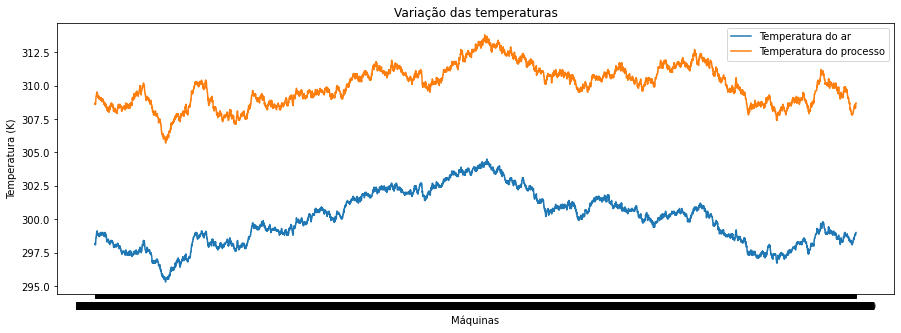

In [149]:
# criar um gráfico de linha para as temperaturas
plt.figure(figsize=(15,5))
plt.plot(df_train['product_id'], df_train['air_temperature_k'], label='Temperatura do ar')
plt.plot(df_train['product_id'], df_train['process_temperature_k'], label='Temperatura do processo')

# adicionar título e rótulos para os eixos
plt.title('Variação das temperaturas')
plt.xlabel('Máquinas')
plt.ylabel('Temperatura (K)')

# adicionar uma legenda
plt.legend()

# mostrar o gráfico
plt.show()

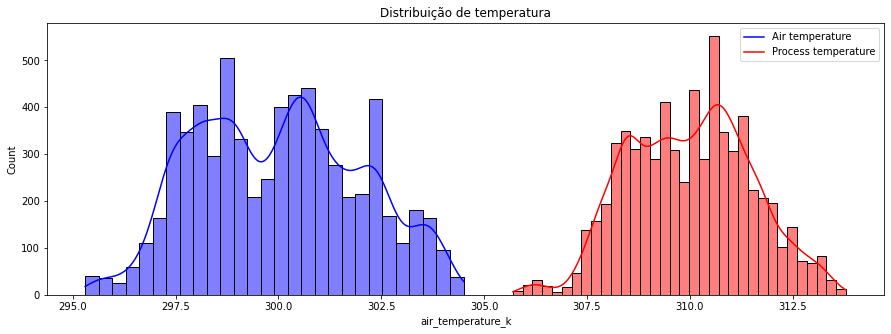

In [150]:
# Histograma das variáveis de temperatura
plt.figure(figsize=(15,5))
sns.histplot(df_train['air_temperature_k'], color='blue', kde=True)
sns.histplot(df_train['process_temperature_k'], color='red', kde=True)
plt.title('Distribuição de temperatura')
plt.legend(['Air temperature', 'Process temperature'])
plt.show()


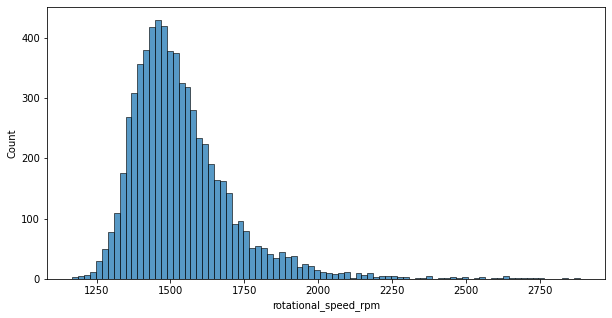

In [151]:
# Histograma da variável de rotação
plt.figure(figsize=(10,5))
sns.histplot(df_train['rotational_speed_rpm']);


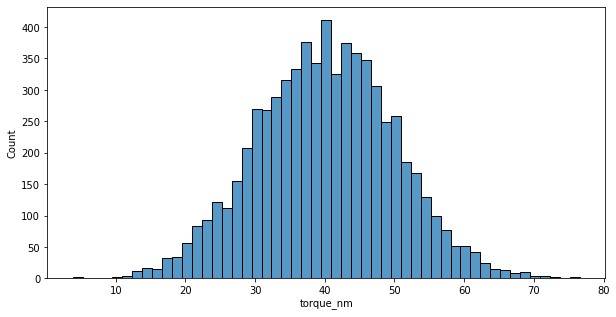

In [152]:
# Histograma da variável de torque
plt.figure(figsize=(10,5))
sns.histplot(df_train['torque_nm']);


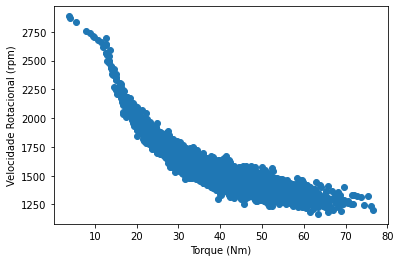

In [153]:
# criar um gráfico de dispersão
plt.scatter(df_train['torque_nm'], df_train['rotational_speed_rpm'])

# adicionar rótulos para os eixos
plt.xlabel('Torque (Nm)')
plt.ylabel('Velocidade Rotacional (rpm)')

# mostrar o gráfico
plt.show()

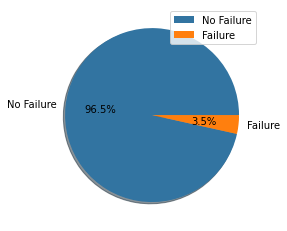

In [161]:
# Analisando a porcentagem de falhas nas máquinas
df_train.loc[df_train.failure_type!='No Failure']='Failure'

labels = ['No Failure', 'Failure']
colors = ['#3274a1','#FF7F0E']
plt.pie(df_train['failure_type'].value_counts(), labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', )
plt.legend(labels);

## **Conclusão**


---

> O objetivo deste notebook foi trazer alguma primeira impressão sobre os dados. Para isso foi feita uma descrição gráfica dos dados, calculando as principais estatísticas descritivas como média, mediana, desvio padrão, valor mínimo e máximo. Utilizando histogramas, gráficos de dispersão e de barras.
> A utilização de histogramas para visualizar a distribuição dos dados e verificar se eles seguem uma distribuição normal ou se possuem valores extremos. Os gráficos de dispersão permitem visualizar a relação entre duas variáveis e identificar possíveis padrões ou outliers. As principais estatísticas descritivas que podem ser calculadas incluem a média e o desvio padrão, que permitem ter uma ideia da tendência central e variabilidade dos dados, respectivamente. A mediana e os quartis também são importantes para identificar a dispersão dos dados e verificar a presença de outliers. Além disso, é importante verificar se há valores faltantes ou inconsistentes nos dados, pois eles podem impactar a análise e modelagem posterior. A escolha dessas estatísticas e gráficos é importante para obter uma visão geral dos dados e identificar possíveis problemas e padrões, o que pode ser útil para orientar a escolha de variáveis e modelos para a previsão da variável alvo.